In [19]:
import numpy as np
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [20]:
filePath = "jsons/Gordon_Ridge_Rapids_-120.9068612_45.5653746_z18.json"

with open(filePath, 'r') as f:
    json_obj = json.load(f)

print(json_obj)

{'name': 'Gordon_Ridge_Rapids', 'longitude': -120.9068612, 'latitude': 45.5653746, 'zoom': 18, 'image': 'images/Gordon_Ridge_Rapids_-120.9068612_45.5653746_z18.png', 'class': '', 'map': 'masks/Gordon_Ridge_Rapids_-120.9068612_45.5653746_z18.pn.npy'}


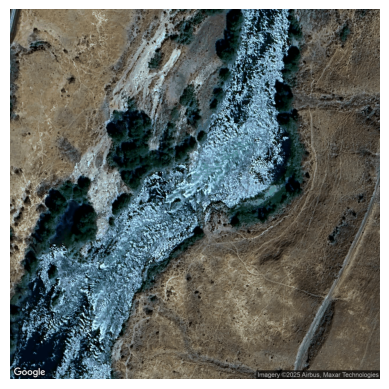

Height:  1280
Width:  1280
(1280, 1280, 3)


In [21]:
imgPath = json_obj['image']

img = mpimg.imread(imgPath)
plt.imshow(img)
plt.axis('off')
plt.show()

image = Image.open(imgPath)
if image.mode != 'RGB':
    image = image.convert('RGB')
image_array = np.array(image)

height, width = image_array.shape[:2]
print("Height: ", height)
print("Width: ", width)

print(image_array.shape)

In [22]:
maskPath = json_obj['map']
mask = np.load(maskPath)
mask = np.squeeze(mask)
mask_expanded = mask[:, :, np.newaxis]
print(mask_expanded.shape)

(1280, 1280, 1)


In [23]:
masked_array = image_array * mask_expanded
print(masked_array.shape)

(1280, 1280, 3)


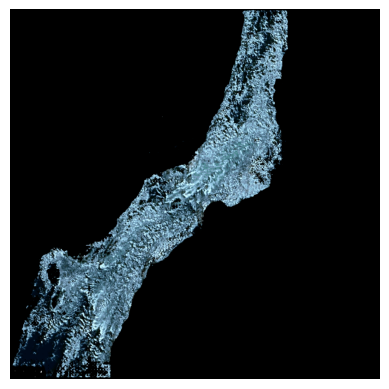

In [24]:
masked_image = masked_array.astype(np.uint8)
plt.imshow(masked_image)
plt.axis('off')
plt.show()